<a href="https://colab.research.google.com/github/IsabelGayayan/Data-Mining/blob/main/Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Iris Flower Species**

The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository.

It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

Dataset Link: https://www.kaggle.com/datasets/uciml/iris

This project covers the key concepts of the Perceptron algorithm, including how to train and test a model, and how to visualize the decision boundary. It also allows users the opportunity to work with a real dataset and apply the Perceptron algorithm to a practical problem.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#import data and libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Iris.csv')

In [ ]:
#descriptive stats
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
# Separate features and labels
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [ ]:
# Split dataset
from sklearn.model_selection import train_test_split
#test_size = 0.5 which will split data into: 50% testing and 50% training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 42)
X_train.shape

(75, 5)

In [ ]:
#standardize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from pandas.core.common import random_state
from sklearn.linear_model import Perceptron
#iterations
max_iter = 40
#learning rate
eta0 = 0.1
#random state
random_state = np.random.RandomState(seed=42)

#build model
perceptron_model = Perceptron(max_iter = max_iter,eta0 = eta0,random_state = random_state)
perceptron_model.fit(X_train,y_train)

Perceptron(eta0=0.1, max_iter=40,
           random_state=RandomState(MT19937) at 0x7F9A80A3DE40)

In [ ]:
#make predictions
y_pred = perceptron_model.predict(X_test)

from sklearn.metrics import accuracy_score
#check accuracy score
print("Accuracy Score: {0:.2f}%".format(accuracy_score(y_test,y_pred)*100))

Accuracy Score: 82.67%


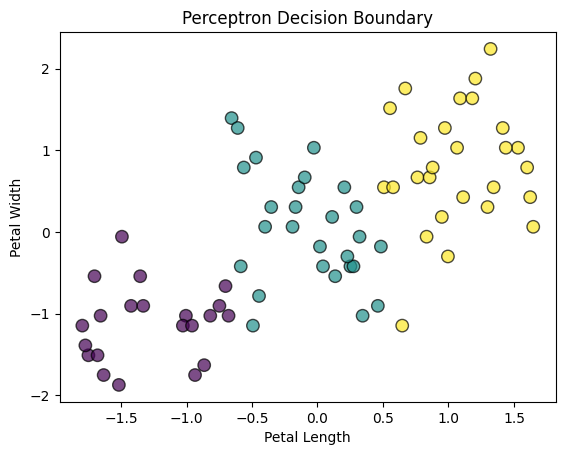

In [ ]:
#perceptron decision boundary plot
def decision_boundary(X, y, perceptron_model):
    #find min and max of petal length and width
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=80, alpha=0.7)

    #set titles and labels
    plt.xlabel("Petal Length")
    plt.ylabel("Petal Width")
    plt.title("Perceptron Decision Boundary")
    plt.show()

#print
decision_boundary(X_train, y_train, perceptron_model)